# Credits: Data Used for the Project
+ https://github.com/lukasgarbas/nlp-text-emotion/blob/master/data/data_train.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import neattext.functions as nfx

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/lukasgarbas/nlp-text-emotion/master/data/data_test.csv")

In [5]:
df.head()

,Emotion,Text
0,sadness,I experienced this emotion when my grandfather...
1,neutral,"when I first moved in , I walked everywhere ...."
2,anger,"` Oh ! "" she bleated , her voice high and rath..."
3,fear,"However , does the right hon. Gentleman recogn..."
4,sadness,My boyfriend didn't turn up after promising th...


In [6]:
df.shape

(3393, 2)

In [7]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [8]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

<AxesSubplot:>

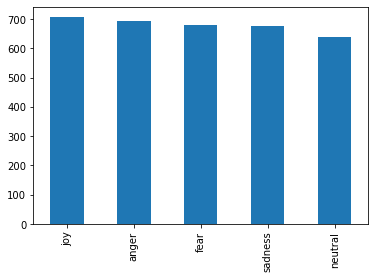

In [9]:
df['Emotion'].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Emotion', ylabel='count'>

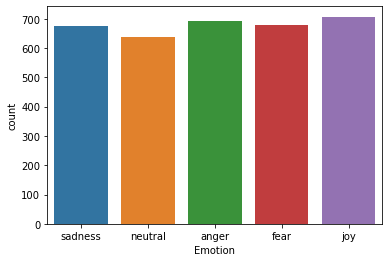

In [10]:
sns.countplot(x="Emotion", data=df)

In [11]:
#sentiment analysis
from textblob import TextBlob

## Exploration
+ Text Cleaning
+ Sentiment Analysis
+ Keyword Extraction
    - Keywords for each emotion
        - Wordcloud

In [12]:
# Performing Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [13]:
get_sentiment("I do not like sports")

'Neutral'

In [14]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [15]:
df.head()

,Emotion,Text,Sentiment
0,sadness,I experienced this emotion when my grandfather...,positive
1,neutral,"when I first moved in , I walked everywhere ....",positive
2,anger,"` Oh ! "" she bleated , her voice high and rath...",positive
3,fear,"However , does the right hon. Gentleman recogn...",positive
4,sadness,My boyfriend didn't turn up after promising th...,positive


In [16]:
df.groupby(['Emotion','Sentiment']).size()

Emotion  Sentiment
anger    Negative     299
         Neutral      220
         positive     174
fear     Negative     261
         Neutral      228
         positive     190
joy      Negative      71
         Neutral      216
         positive     420
neutral  Negative      58
         Neutral      432
         positive     148
sadness  Negative     269
         Neutral      253
         positive     154
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

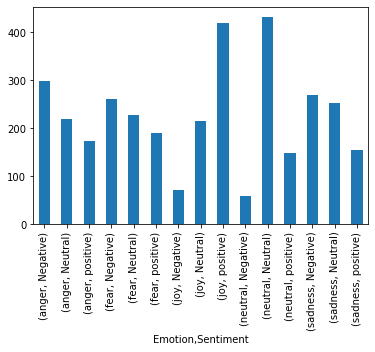

In [17]:
df.groupby(['Emotion','Sentiment']).size().plot(kind="bar")

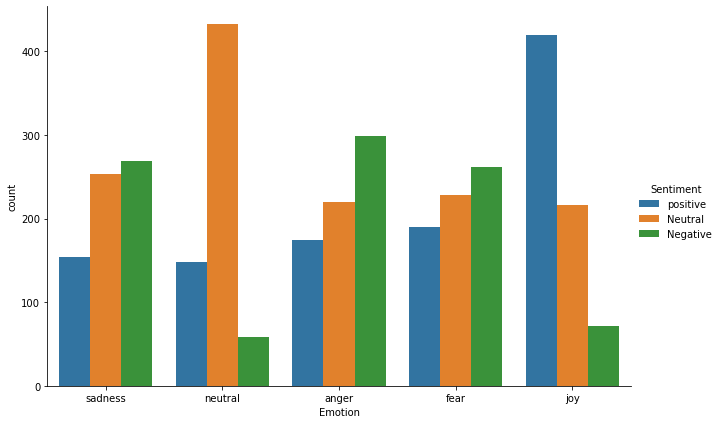

In [18]:
sns.catplot(x="Emotion", hue="Sentiment", data=df, kind="count", height=6, aspect=1.5)

## Text cleaning
    # Remove noise
        - stopwords
        - special characters
        - punctuations
        - emojis

In [19]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [21]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [22]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [23]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.replace_special_characters)

In [24]:
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,I experienced this emotion when my grandfather...,experienced emotion grandfather passed away
1,"when I first moved in , I walked everywhere ....",moved walked week purse stolen <SPECIAL_CHA...
2,"` Oh ! "" she bleated , her voice high and rath...",Oh bleated voice high indignant
3,"However , does the right hon. Gentleman recogn...",right hon Gentleman recognise profound disqui...
4,My boyfriend didn't turn up after promising th...,boyfriend turn promising coming
...,...,...
3388,"My sweetheart left me, or rather we decided to...",sweetheart left me decided break mutual consen...
3389,"Well , it's too bad that we like different kin...",bad like different kinds movies Maybe were d...
3390,It sure is .,sure
3391,He ’ s got laid off again . I do feel sorry fo...,<SPECIAL_CHAR> got laid feel sorry


## Keyword Extraction
+ Extract the most common words per class of emotion

In [25]:
from collections import Counter

In [26]:
def extract_keywords(text, num=50):
    tokens = [tok for tok
              in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [27]:
# list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [28]:
emotion_list

['sadness', 'neutral', 'anger', 'fear', 'joy']

In [29]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [30]:
joy_docx =  ' '.join(joy_list)

In [31]:
joy_docx

'headache getting worse worse  Raffaella s command English slipped grew increasingly excited  happy scholarship continue studying university approved cancelled Manufacturers play excitement commentary sell sets   Merry Christmas  Steven  passed exam required authorized Radio<SPECIAL_CHAR>TV dealer Hi  Tom  Want play bowling tonight  got good reaction tutor tutorial group presentation Id given worried about Family member survived operation fellow player unexpectedly scores goal means draw passed job interview <SPECIAL_CHAR> right  lot learn  entered University nephew  looks lot like  mum   Reflecting experience  Donia said <SPECIAL_CHAR>  think re exhilarated determination strength human spirit   mother sister thinking old times childhood happy time Richard s elation regaining health short lived kidneys started fail  got scholarship letter Australia    asked eightyearold  delighted managed amuse mature woman nineteen  later  Drive carefully  heard passed MCE Exam spent day dancing eatin

In [32]:
# Extract keywords
keyword_joy = extract_keywords(joy_docx)

In [33]:
keyword_joy

{'time': 50,
 'happy': 46,
 'friend': 44,
 '<SPECIAL_CHAR>': 41,
 'passed': 36,
 'got': 36,
 'felt': 32,
 'love': 31,
 'good': 30,
 's': 29,
 'joy': 27,
 'exam': 26,
 'year': 25,
 'like': 23,
 'university': 22,
 'came': 22,
 'going': 21,
 'told': 20,
 'school': 20,
 'excitement': 19,
 'results': 19,
 'long': 19,
 'friends': 18,
 'heard': 17,
 'feeling': 17,
 'Oh': 17,
 'great': 17,
 'met': 17,
 'me': 17,
 'went': 16,
 'Im': 16,
 'pleased': 16,
 'home': 16,
 'years': 16,
 'work': 16,
 'girl': 16,
 'excited': 15,
 'right': 15,
 'mother': 15,
 'letter': 15,
 'Thank': 15,
 'accepted': 15,
 'received': 15,
 'gave': 15,
 'parents': 14,
 'Yes': 14,
 'delighted': 13,
 'day': 13,
 'way': 13,
 'selected': 13}

In [34]:
# plot it out
def plot_most_common_words(mydict, emotion_name):
    df_01 = pd.DataFrame(mydict.items(), columns = ['token', 'count'])
    plt.figure(figsize = (20, 10))
    plt.title("Plot of {} most common Keywords".format(emotion_name))
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

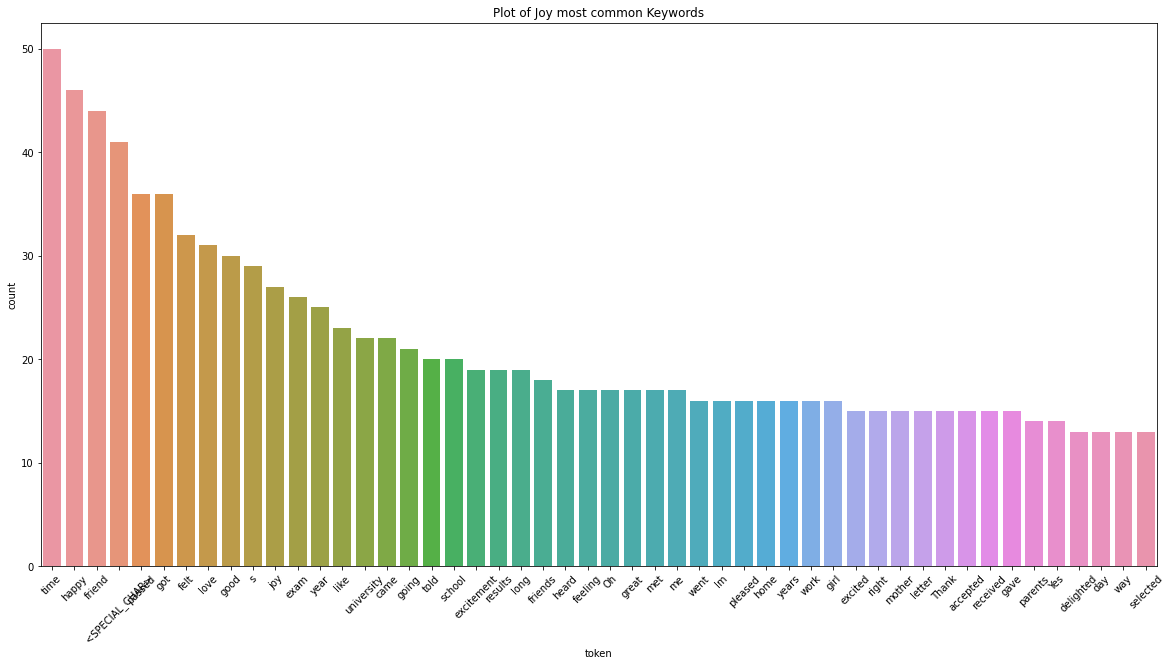

In [35]:
plot_most_common_words(keyword_joy, "Joy")

In [36]:
sadness_list = df[df['Emotion'] == 'sadness']['Clean_Text'].tolist()
sadness_docx = ''.join(sadness_list)
keyword_sadness = extract_keywords(sadness_docx)

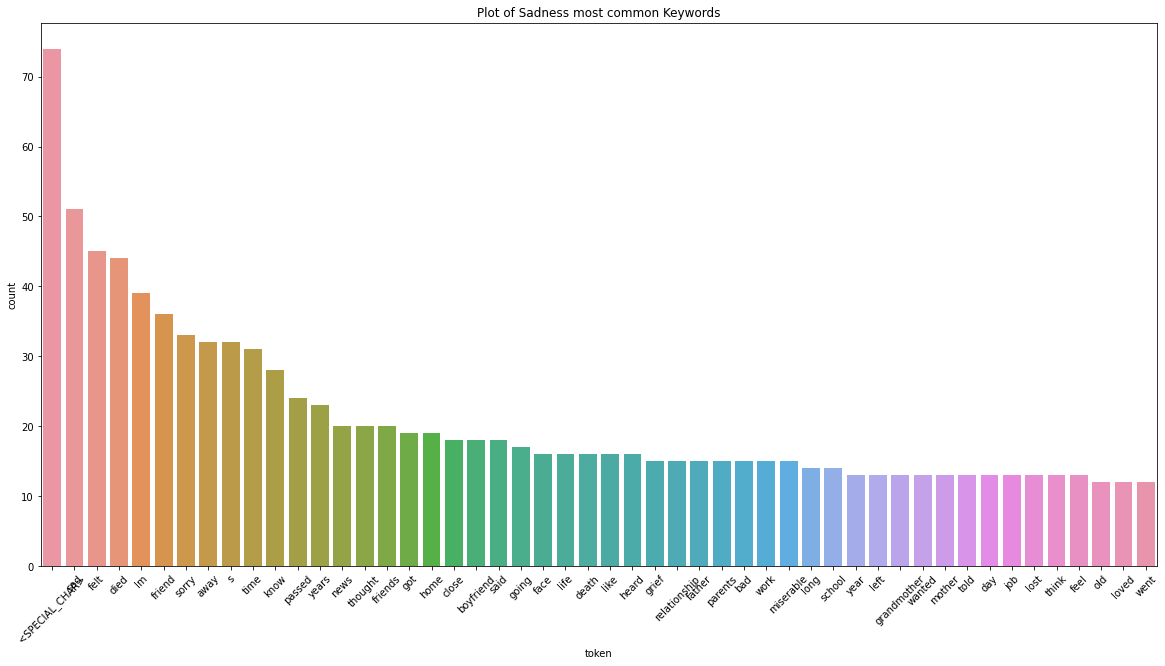

In [37]:
plot_most_common_words(keyword_sadness, "Sadness")

In [38]:
# Word Cloud
from wordcloud import WordCloud

In [39]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(10,10))
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

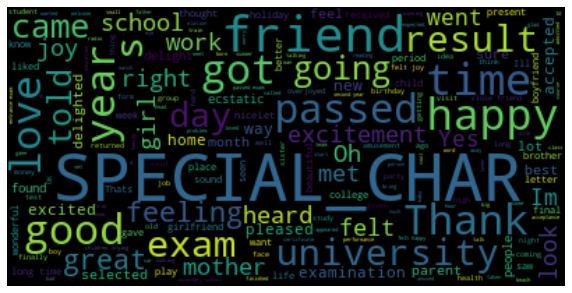

In [40]:
plot_wordcloud(joy_docx)

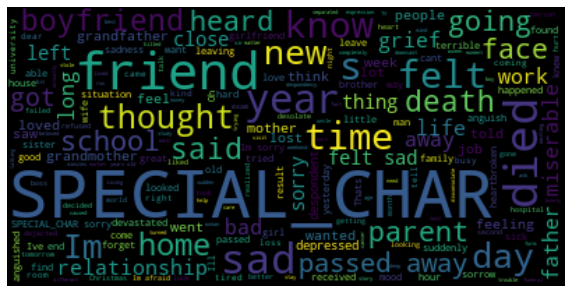

In [41]:
plot_wordcloud(sadness_docx)

# Machine learning aspect
+ Naive Bayes
+ LogisticRegression
+ KNN
+ DecisionTree

Compare with SparkNLP/NLU John Snows Lab

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

In [43]:
X_features = df['Clean_Text']
y_labels = df['Emotion']

In [44]:
cv = CountVectorizer()
X = cv.fit_transform(X_features)

In [45]:
cv.get_feature_names_out()

array(['10', '100', '11', ..., 'zombie', 'zone', 'zzap'], dtype=object)

In [46]:
#To dense array (numpy)
#X.toarray()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size = 0.3, random_state = 42)

## Building our Model

In [48]:
#Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [49]:
nb_model.score(X_test, y_test)

0.56286836935167

In [50]:
y_predict_for_nb = nb_model.predict(X_test)

In [51]:
y_predict_for_nb

array(['anger', 'joy', 'sadness', ..., 'sadness', 'neutral', 'anger'],
      dtype='<U7')

## Making a Single prediction
+ Vextorize our model
+ Applu our model

In [52]:
my_sample_text = ['I love to code so much']

In [53]:
vect_text = cv.transform(my_sample_text).toarray()

In [54]:
nb_model.predict(vect_text)

array(['joy'], dtype='<U7')

In [55]:
#check for the prediction probability(confidence score)
nb_model.predict_proba(vect_text)

array([[0.18231013, 0.03509153, 0.39927742, 0.03594598, 0.34737494]])

In [56]:
nb_model.classes_

array(['anger', 'fear', 'joy', 'neutral', 'sadness'], dtype='<U7')

In [57]:
#putting it into a function
def predict_emotion(my_sample_text, model):
    myvect = cv.transform(my_sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print("Prediction:{}, Prediction Score: {}".format(prediction[0], np.max(pred_proba)))
    return pred_percentage_for_all

In [58]:
predict_emotion(my_sample_text, nb_model)

Prediction:joy, Prediction Score: 0.39927742481874323


{'anger': 0.18231013402083787,
 'fear': 0.0350915294442945,
 'joy': 0.39927742481874323,
 'neutral': 0.035945976648399394,
 'sadness': 0.3473749350677273}

In [59]:
predict_emotion(['She does not like running all day'], nb_model)

Prediction:anger, Prediction Score: 0.8379712070414974


{'anger': 0.8379712070414974,
 'fear': 0.062236220082417436,
 'joy': 0.03515718121224291,
 'neutral': 0.04831529094404338,
 'sadness': 0.016320100719799557}

## Model Evaluation

In [60]:
#Classification
print(classification_report(y_test, y_predict_for_nb))

              precision    recall  f1-score   support

       anger       0.47      0.57      0.52       201
        fear       0.65      0.64      0.65       216
         joy       0.63      0.60      0.61       223
     neutral       0.44      0.37      0.40       160
     sadness       0.59      0.58      0.58       218

    accuracy                           0.56      1018
   macro avg       0.56      0.55      0.55      1018
weighted avg       0.56      0.56      0.56      1018



In [61]:
#Confusion matrix
confusion_matrix(y_test, y_predict_for_nb)

array([[115,  22,  17,  13,  34],
       [ 26, 139,  18,  15,  18],
       [ 18,  12, 134,  36,  23],
       [ 47,  18,  24,  59,  12],
       [ 37,  23,  21,  11, 126]], dtype=int64)

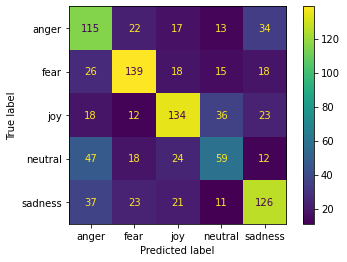

In [62]:
#Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(nb_model,X_test, y_test)

## Save Model

In [63]:
import joblib

In [64]:
model_file = open('Emotion_classifier_nb_model_12_July_2022.pkl','wb')
joblib.dump(nb_model, model_file)
model_file.close

<function BufferedWriter.close>

## Model Interpretation
+ Eli5 (You can't use Eli5 to interpret when you use Naive Bayes - Use Logistic regression)
+ Lime
+ Shap

In [65]:
# Creating a Pipeline

In [66]:
# LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [67]:
#Accuracy
lr_model.score(X_test, y_test)

0.5736738703339882

In [68]:
#Single prediction
predict_emotion(my_sample_text, lr_model)

Prediction:joy, Prediction Score: 0.4395538897059083


{'anger': 0.11017605341212587,
 'fear': 0.10077418215877317,
 'joy': 0.4395538897059083,
 'neutral': 0.20792651240931587,
 'sadness': 0.1415693623138769}

In [69]:
#Interpret model
import eli5

In [70]:
#Show the weights for each class/label
eli5.show_weights(lr_model, top=20)

In [71]:
class_names = y_labels.unique().tolist()

In [74]:
feature_names = cv.get_feature_names_out()

In [79]:
eli5.show_weights(lr_model, feature_names=feature_names, target_names=class_names)

In [78]:
?eli5.show_weights

Signature: eli5.show_weights(estimator, **kwargs)
Docstring:
Return an explanation of estimator parameters (weights)
as an IPython.display.HTML object. Use this function
to show classifier weights in IPython.

:func:`show_weights` accepts all
:func:`eli5.explain_weights` arguments and all
:func:`eli5.formatters.html.format_as_html`
keyword arguments, so it is possible to get explanation and
customize formatting in a single call.

Parameters
----------
estimator : object
    Estimator instance. This argument must be positional.

top : int or (int, int) tuple, optional
    Number of features to show. When ``top`` is int, ``top`` features with
    a highest absolute values are shown. When it is (pos, neg) tuple,
    no more than ``pos`` positive features and no more than ``neg``
    negative features is shown. ``None`` value means no limit.

    This argument may be supported or not, depending on estimator type.

target_names : list[str] or {'old_name': 'new_name'} dict, optional
    Name